In [1]:
!git clone https://github.com/yeaung276/NeuralStyleTransfer.git

Cloning into 'NeuralStyleTransfer'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 152 (delta 57), reused 112 (delta 30), pack-reused 0
Receiving objects: 100% (152/152), 7.91 MiB | 37.68 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [2]:
cd NeuralStyleTransfer

/content/NeuralStyleTransfer


In [3]:
!wget https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat

--2023-05-29 07:41:21--  https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘imagenet-vgg-verydeep-19.mat’

imagenet-vgg-veryde 100%[===================>] 510.12M  34.8MB/s    in 15s     

2023-05-29 07:41:37 (33.5 MB/s) - ‘imagenet-vgg-verydeep-19.mat’ saved [534904783/534904783]



In [4]:
from google.colab import files
import matplotlib.pyplot as plt
from core.preprocessor import Preprocessor
from core.NST import NST

Upload the style and content image for preprocessing

Saving starryNight_resize.jpg to starryNight_resize.jpg


Saving monelisa.jpg to monelisa.jpg


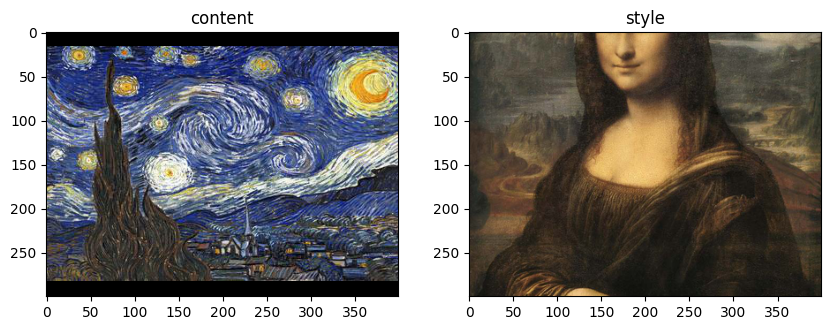

In [5]:
# upload content and style image
content = files.upload()
style = files.upload()
content_filename_uploaded = list(content.keys())[-1]
style_filename_uploaded = list(style.keys())[-1]
plt.figure(figsize=(10, 10))
plt.subplot(121)
content_img = Preprocessor.transform(content_filename_uploaded)
plt.imshow(Preprocessor.post_process(content_img))
plt.title('content')

plt.subplot(122)
style_img = Preprocessor.transform(style_filename_uploaded)
plt.imshow(Preprocessor.post_process(style_img))
plt.title('style')
plt.show()

Initialize the modal using the weight trained in this paper.[https://arxiv.org/abs/1409.1556](https://arxiv.org/abs/1409.1556)

In [6]:
NST.initialize('imagenet-vgg-verydeep-19.mat')

Setting up intermediate layer to be used in style cost and content cost calculation.
### Model Architecture and Layers
#### available layersname
        conv1_1
        conv1_2
        conv2_1
        conv2_2
        conv3_1
        conv3_2
        conv3_3
        conv3_4
        conv4_1
        conv4_2
        conv4_3
        conv4_4
        conv5_1
        conv5_2
        conv5_3
        conv5_4

  You can choose a list of layer and respective weight in calculating content and style cost.
  $J = \alpha  J_c + \beta  J_s$
  <br>
  J = total cost<br>
  $J_c$ = content cost<br>
  $J_s$ = style cost<br>

In [7]:
NST.set_style_layers([
    ('conv2_1',0.5),
    ('conv3_1',0.5),])
NST.set_content_layers([
    ('conv4_2',1)
])
NST.set_cost_weights(alpha=0.5,beta=0.5)

## Hyperperamater Tuning

In [9]:
NST.set_learning_rate(lr=2.0)

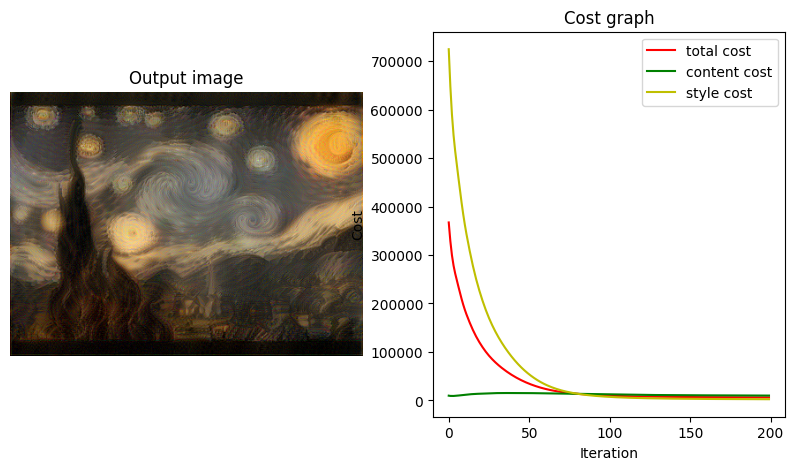

In [10]:
plt.figure(figsize=(10, 10))
unprocessed_img, costs = NST.generate(content_img,style_img,no_iter=200, display=True)

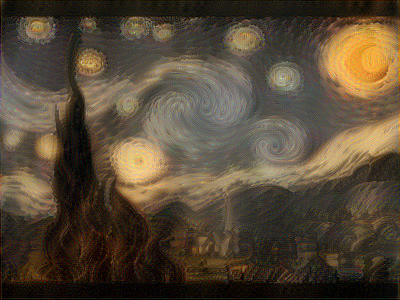

In [11]:
img = Preprocessor.post_process(unprocessed_img)
img.save('output.png')
img.show()